In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
filename=pd.read_csv("vectorfires.csv")

In [3]:
filename1=filename.copy()

In [4]:
filename1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
filename1.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
filename1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
filename1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
from sklearn import preprocessing

In [15]:
label_encoder=preprocessing.LabelEncoder()

In [18]:
filename1['month']=label_encoder.fit_transform(filename1['month'])
filename1['day']=label_encoder.fit_transform(filename1['day'])

In [19]:
filename1.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small


<AxesSubplot:>

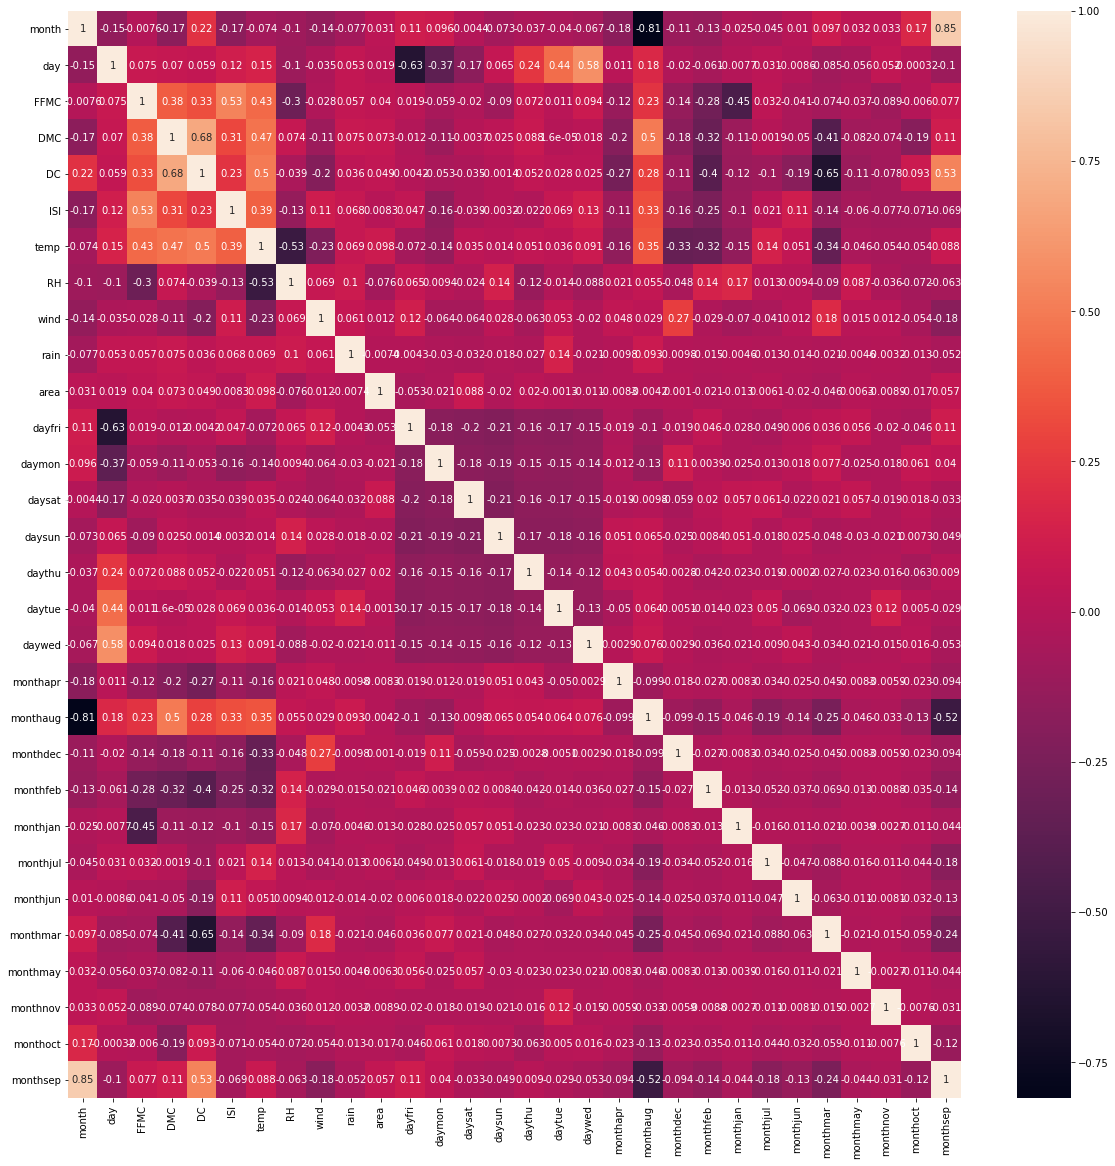

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
corr=filename1.corr()
sns.heatmap(corr,annot=True)

In [21]:
filename.shape

(517, 31)

In [9]:
filename2.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

# Split dataset into training and testing

In [26]:
X=filename1.iloc[:,0:30]
Y=filename1.iloc[:,30]

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [28]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((361, 30), (361,), (156, 30), (156,))

# Grid Search CV

In [29]:
clf=SVC()

In [30]:
param_grid=[{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.001]}]

In [31]:
gsv=GridSearchCV(clf,param_grid,cv=10)

In [32]:
gsv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [33]:
gsv.best_params_, gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.7258258258258259)

In [34]:
clf=SVC(C=15,gamma=50)
clf.fit(X_train , Y_train)

SVC(C=15, gamma=50)

In [35]:
Y_pred=clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, Y_pred)

Accuracy = 75.64102564102564


array([[  0,  38],
       [  0, 118]], dtype=int64)

# Kernal=linear

In [38]:
clf = SVC(kernel='linear')
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

print(classification_report(Y_test,Y_pred))

0.7564102564102564
              precision    recall  f1-score   support

       large       0.00      0.00      0.00        38
       small       0.76      1.00      0.86       118

    accuracy                           0.76       156
   macro avg       0.38      0.50      0.43       156
weighted avg       0.57      0.76      0.65       156



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Kernal=poly

In [39]:
clf = SVC(kernel='poly')
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

0.7884615384615384
              precision    recall  f1-score   support

       large       1.00      0.13      0.23        38
       small       0.78      1.00      0.88       118

    accuracy                           0.79       156
   macro avg       0.89      0.57      0.55       156
weighted avg       0.83      0.79      0.72       156



In [40]:
#try to build a model by droping month and day columns
filename2=filename1.drop(columns=['month','day'])

In [41]:
X = filename2.drop(columns = ["size_category"])
Y = filename2["size_category"]

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
SVC
model_linear = SVC(kernel = "linear")
model_linear.fit(X_train,Y_train)
pred_test_linear = model_linear.predict(X_test)
np.mean(pred_test_linear==Y_test)
from sklearn.metrics import classification_report
linear = classification_report(Y_test, pred_test_linear)
print(linear)

              precision    recall  f1-score   support

       large       0.94      1.00      0.97        31
       small       1.00      0.97      0.99        73

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104



In [43]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train,Y_train)
pred_test_rbf = model_rbf.predict(X_test)
np.mean(pred_test_rbf==Y_test)
rbf = classification_report(Y_test, pred_test_rbf)
print(rbf)

              precision    recall  f1-score   support

       large       1.00      0.10      0.18        31
       small       0.72      1.00      0.84        73

    accuracy                           0.73       104
   macro avg       0.86      0.55      0.51       104
weighted avg       0.81      0.73      0.64       104



In [44]:
model_rbf = SVC(kernel = "poly")
model_rbf.fit(X_train,Y_train)
pred_test_rbf = model_rbf.predict(X_test)
np.mean(pred_test_rbf==Y_test)
rbf = classification_report(Y_test, pred_test_rbf)
print(rbf)

              precision    recall  f1-score   support

       large       1.00      0.16      0.28        31
       small       0.74      1.00      0.85        73

    accuracy                           0.75       104
   macro avg       0.87      0.58      0.56       104
weighted avg       0.82      0.75      0.68       104



# now we can say that after deleting month and day columns from dataset model accuracy is increased.